In [81]:
!pip install requests pandas matplotlib

In [96]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(stock_symbol, api_key):
    url = f"https://yfapi.net/v6/finance/quote?symbols={stock_symbol}"
    headers = {
        'x-api-key': api_key
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()

        if 'quoteResponse' in data and data['quoteResponse']['result']:
            stock_info = data['quoteResponse']['result'][0]
            stock_data = {
                'Ticker Name': stock_info.get('symbol', 'N/A'),
                'Full Name': stock_info.get('longName', 'N/A'),
                'Current Price': stock_info.get('regularMarketPrice', 'N/A'),
                'Target Mean Price': stock_info.get('targetMeanPrice', 'N/A'),
                '52 Week High': stock_info.get('fiftyTwoWeekHigh', 'N/A'),
                '52 Week Low': stock_info.get('fiftyTwoWeekLow', 'N/A')
            }
            return stock_data
        else:
            print(f"No data found for {stock_symbol}. Please check the ticker symbol.")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {stock_symbol}: {e}")
        return None

def display_stock_info(stock_data):
    print("\nStock Information:")
    print(f"Ticker Name: {stock_data['Ticker Name']}")
    print(f"Full Name: {stock_data['Full Name']}")
    print(f"Current Price: {stock_data['Current Price']}")
    print(f"Target Mean Price: {stock_data['Target Mean Price']}")
    print(f"52 Week High: {stock_data['52 Week High']}")
    print(f"52 Week Low: {stock_data['52 Week Low']}")

def get_trending_stocks(api_key):
    url = "https://yfapi.net/v6/finance/trending/US"
    headers = {
        'x-api-key': api_key
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()

        if 'finance' in data and 'result' in data['finance']:
            trending_stocks = data['finance']['result'][:5]
            return trending_stocks
        else:
            print("No trending stocks data found.")
            return []
    except requests.exceptions.RequestException as e:
        print(f"Error fetching trending stocks: {e}")
        return []

def save_to_csv(stock_data, trending_stocks):
    try:
        stock_df = pd.DataFrame([stock_data])
        trending_df = pd.DataFrame(trending_stocks)

        stock_df.to_csv('stock_data.csv', index=False)
        trending_df.to_csv('trending_stocks.csv', index=False)
        print("\nStock and trending data saved to CSV files.")
    except Exception as e:
        print(f"Error saving data to CSV: {e}")

if __name__ == "__main__":
    api_key = "XYZ"

    stock_symbol = input("Enter stock ticker symbol: ").upper()

    stock_data = get_stock_data(stock_symbol, api_key)

    if stock_data:
        display_stock_info(stock_data)

        trending_stocks = get_trending_stocks(api_key)

        print("\nTrending Stocks:")
        for stock in trending_stocks:
            print(f"{stock['symbol']}: {stock['longName']}")

        save_to_csv(stock_data, trending_stocks)
    else:
        print(f"No data available for {stock_symbol}. Please check the ticker symbol and try again.")


Enter stock ticker symbol: AAPL

Stock Information:
Ticker Name: AAPL
Full Name: Apple Inc.
Current Price: 227.725
Target Mean Price: N/A
52 Week High: 237.23
52 Week Low: 164.08
Error fetching trending stocks: 403 Client Error: Forbidden for url: https://yfapi.net/v6/finance/trending/US

Trending Stocks:

Stock and trending data saved to CSV files.


Enter stock ticker symbol: AAPL


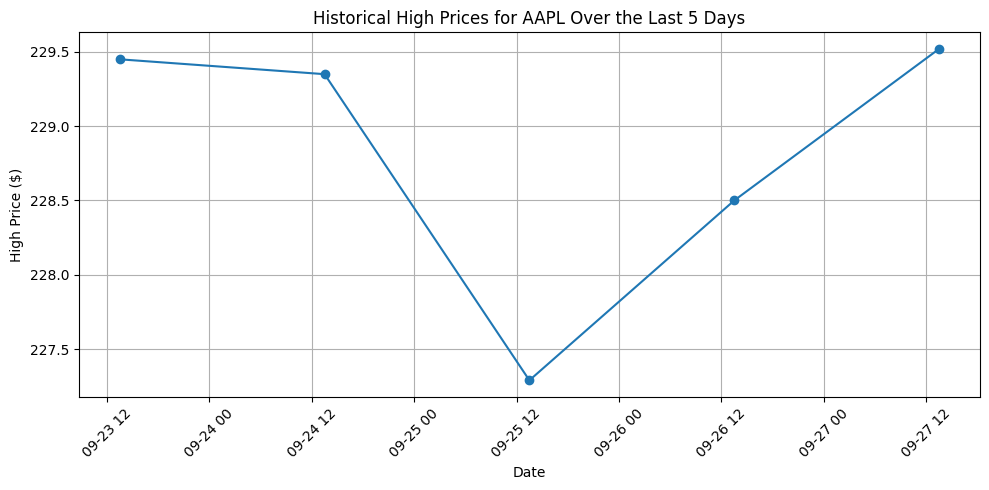

In [97]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def get_historical_data(stock_symbol, api_key):

    url = f"https://yfapi.net/v8/finance/chart/{stock_symbol}?range=5d&interval=1d"
    headers = {
        'x-api-key': api_key
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()

        if 'chart' in data and data['chart']['result']:
            historical_data = data['chart']['result'][0]
            timestamps = historical_data['timestamp']
            high_prices = historical_data['indicators']['quote'][0]['high']  # Get high prices

            return timestamps, high_prices
        else:
            print("No historical data found.")
            return None, None
    except requests.exceptions.RequestException as e:
        print(f"Error fetching historical data for {stock_symbol}: {e}")
        return None, None

def plot_historical_highs(stock_symbol, timestamps, high_prices):
    dates = pd.to_datetime(timestamps, unit='s')

    plt.figure(figsize=(10, 5))
    plt.plot(dates, high_prices, marker='o')
    plt.title(f'Historical High Prices for {stock_symbol} Over the Last 5 Days')
    plt.xlabel('Date')
    plt.ylabel('High Price ($)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    api_key = "XYZ"

    stock_symbol = input("Enter stock ticker symbol: ").upper()

    timestamps, high_prices = get_historical_data(stock_symbol, api_key)

    if timestamps and high_prices:
        plot_historical_highs(stock_symbol, timestamps, high_prices)
    else:
        print(f"No historical data available for {stock_symbol}.")
